# Simple model for LHb neurons
## based upon the Hindmarsh-Rose bursting model 

**Reference:**<br> Hindmarsh, J. L., & Rose, R. M.<br> A model of neuronal bursting using three coupled first
  order differential equations. Proceedings of the Royal society of London, Series B. Biological sciences **221**(1222): 87-102, 1984.


$\newcommand{\rmd}{\textrm{d}}$
$\newcommand{\eqdef}{:=}$
$\newcommand{\eps}{\varepsilon}$

We consider an extended version of the Hindmarsh-Rose bursting model, where we had a slow process on a parameter directly the timescale 
of the main fast variable (corresponding to membrane potential in a biophysical model).
Parameter values are chosen so that the system is poised in the vicinity of a codimension-2 *saddle-node homoclinic (SNH)* bifurcation. Then, varying periodically one of these 2 parameters (the applied current $I$ and the potassium channel activation time constant $\tau$; see below) while keeping the other one at a fixed value either below or above that of the SNH point allows to obtain the two bursting patterns (*square-wave* and *parabolic*) obversed in the data.

The differential equations read:

\begin{aligned}
x^{\prime} & =c(x-x^3/3-y+z)\\
y^{\prime} & =(x^2+dx-by+a)/c\\
z^{\prime} & =-\eps(c-c0)\\
c^{\prime} & = \eps(z-z0)\\
\end{aligned}

the last two equations corresponding to a slow (harmonic) forcing on $(z,c)$, centred at $(z_0,c_0)$. 

&copy; [Fabien Campillo](https://www-sop.inria.fr/members/Fabien.Campillo/index.html) for the python and SDE simulation mastery.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import seaborn as sns
from matplotlib.colors import SymLogNorm


plt.rcParams['font.family'] = "roman"
plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath,mhchem}')

cl = sns.color_palette('tab10', 21)

### Parameter values and initial conditions

In [38]:
# ___ system parameters __________________________________________________________________________

a, b, d = 0.08, 0.71, 1.8      # parameter controlling the y-equation
z0      = 0.00                 # center of the z-component of the slow forcing
eps     = 0.01                 # speed of the slow forcing

# ___ random generator seed ______________________________________________________________________

np.random.seed(123)

# ___ initial condition __________________________________________________________________________

# --- deterministic simulations (SW)
xic1, yic1, zic1, cic1 = -2.08, 0.88, -0.0041, 1.38
ini_cond1 = np.array([xic1,yic1,zic1,cic1])
# --- deterministic simulations (SW)
xic2, yic2, zic2, cic2 = -2.0789587, 0.8781782, -0.00397395, 2.5799
ini_cond2 = np.array([xic2,yic2,zic2,cic2])

# --- SDE simulations (SW)
std_deviation_ini_cond1 = 0.1
ini_cond1_x   = xic1 + np.random.normal(0., std_deviation_ini_cond1)
ini_cond1_y   = yic1 + np.random.normal(0., std_deviation_ini_cond1)
ini_cond1_z   = zic1 + np.random.normal(0., std_deviation_ini_cond1)
ini_cond1_c   = cic1 + np.random.normal(0., std_deviation_ini_cond1)
# --- SDE simulations (P)
std_deviation_ini_cond2 = 0.1
ini_cond2_x   = xic2 + np.random.normal(0., std_deviation_ini_cond2)
ini_cond2_y   = yic2 + np.random.normal(0., std_deviation_ini_cond2)
ini_cond2_z   = zic2 + np.random.normal(0., std_deviation_ini_cond2)
ini_cond2_c   = cic2 + np.random.normal(0., std_deviation_ini_cond2)

### Right-hand side of the system

In [39]:
# ___ ODEs _______________________________________________________________________________________
def HRforced(t, S, c0):
    x, y, z, c = S
    dxdt=c*(x-x*x*x/3-y+z)
    dydt=(x*x+d*x-b*y+a)/c
    dzdt=-eps*(c-c0)
    dcdt= eps*(z-z0)
    return np.array([dxdt,dydt,dzdt,dcdt])

### Simulation of square-wave (SW) bursting

In [40]:
# the applied current will be slowly oscillating while parameter c0 is fixed below the SNH point
c0=1.3
# Simulate the forced HR model in the SW regime
t_span = (0, 2000)  # Time span for simulation
t_eval = np.linspace(t_span[0],t_span[1],100000)  # Time points to evaluate
solSW = solve_ivp(HRforced,t_span,ini_cond1,args=(c0,),t_eval=t_eval,rtol=1e-10)

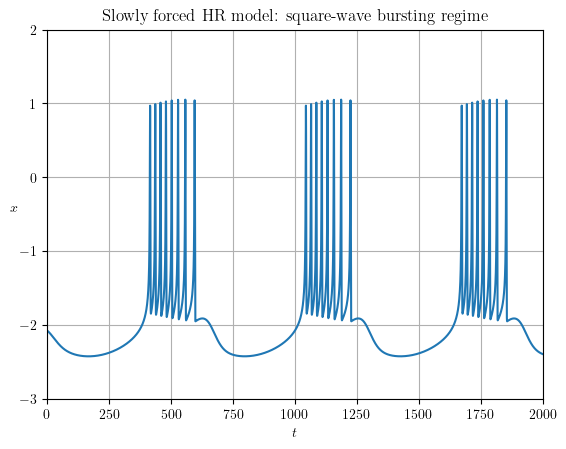

In [41]:
#------
# PLOT
#------
# Plot the solution 
plt.plot(solSW.t,solSW.y[0])
# Add labels 
plt.xlabel('$t$')
plt.ylabel(r'$x$',rotation=0)
plt.title(r'Slowly forced HR model: square-wave bursting regime')
plt.xlim([0, 2000])
plt.ylim([-3, 2])
plt.grid()
plt.show()

### Simulation of parabolic (P) bursting

In [43]:
# the applied current will be slowly oscillating while parameter c0 is fixed below the SNH point
c0=2.5
# Simulate the forced HR model in the SW regime
t_span = (0, 2000)  # Time span for simulation
t_eval = np.linspace(t_span[0],t_span[1],100000)  # Time points to evaluate
solP = solve_ivp(HRforced,t_span,ini_cond2,args=(c0,),t_eval=t_eval,rtol=1e-10)

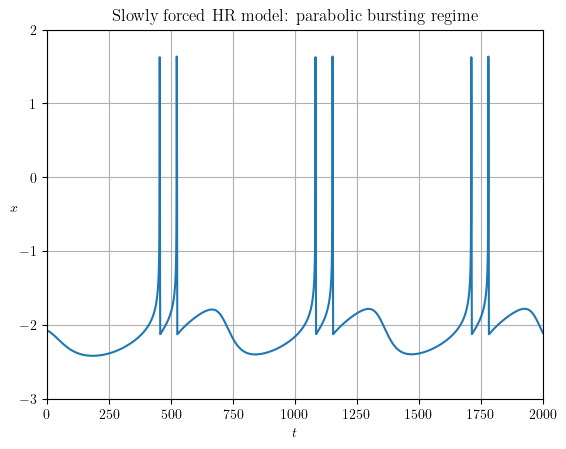

In [44]:
#------
# PLOT
#------
# Plot the solution 
plt.plot(solP.t,solP.y[0])
# Add labels 
plt.xlabel('$t$')
plt.ylabel('$x$',rotation=0)
plt.title('Slowly forced HR model: parabolic bursting regime')
plt.xlim([0, 2000])
plt.ylim([-3, 2])
plt.grid()
plt.show()

### SDE simulation (Euler-Maruyama): square-wave bursting regime

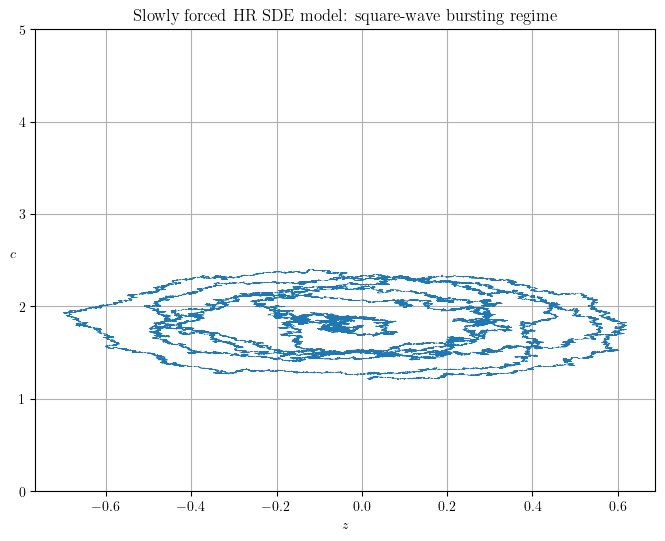

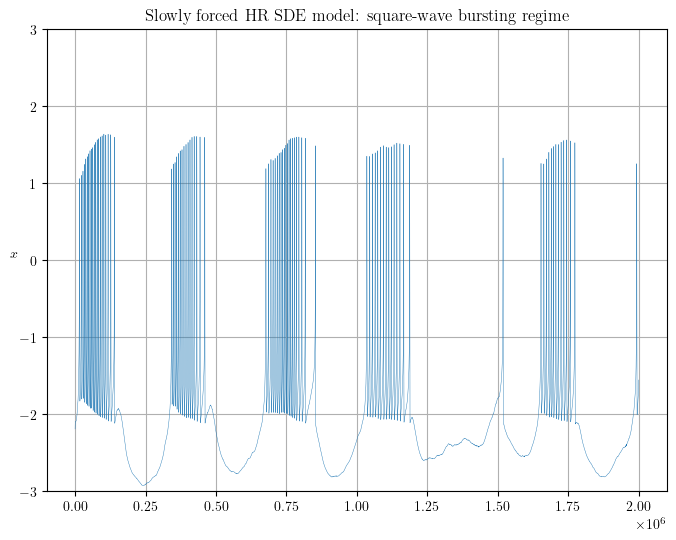

In [20]:
t_max = 4000
nb_time_steps = 2000000
d_t = t_max/nb_time_steps
time_points_sde = np.linspace(0,t_max,nb_time_steps)
sigma_z = 0.75
sigma_c = 0.75
sqrt_d_t = np.sqrt(d_t)
# fix c0 
c0=1.8


# --- memory allocation
solution_sde_x = np.zeros(nb_time_steps)
solution_sde_y = np.zeros(nb_time_steps)
solution_sde_z = np.zeros(nb_time_steps)
solution_sde_c = np.zeros(nb_time_steps)

# --- noise simulation
#     [simulated offline to save computation time]
std_dev_z = sqrt_d_t*sigma_z
std_dev_c = sqrt_d_t*sigma_c
np.random.seed(42)
noise_z = np.random.normal(0., std_dev_z, nb_time_steps)
noise_c = np.random.normal(0., std_dev_c, nb_time_steps)

# --- initialization
t, x, y, z, c = 0, ini_cond1_x, ini_cond1_y, ini_cond1_z, ini_cond1_c

solution_sde_x[0] = x
solution_sde_y[0] = y
solution_sde_z[0] = z
solution_sde_c[0] = c

# --- time iterations
for k in range(1,nb_time_steps):
    dot_x = c*(x-x**3/3-y+z) 
    dot_y = (x**2+d*x-b*y+a)/c
    dot_z = -eps*(c-c0)
    dot_c =  eps*(z-z0) 
    x   += d_t*dot_x
    y   += d_t*dot_y
    z   += d_t*dot_z -eps*noise_z[k]
    c   += d_t*dot_c +eps*noise_c[k]
    solution_sde_x[k] = x
    solution_sde_y[k] = y
    solution_sde_z[k] = z
    solution_sde_c[k] = c
    
# plots
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_z,solution_sde_c,linewidth=0.2)
# Add labels
plt.xlabel('$z$')
plt.ylabel('$c$',rotation=0)
plt.title('Slowly forced HR SDE model: square-wave bursting regime')
plt.ylim([0, 5])
plt.grid()
plt.show()
#
# plot
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_x,linewidth=0.3)
# Add labels
plt.ylabel('$x$',rotation=0)
plt.title('Slowly forced HR SDE model: square-wave bursting regime')
plt.ylim([-3, 3])
plt.grid()
plt.show()
#plt.savefig('noise.png', dpi=300)

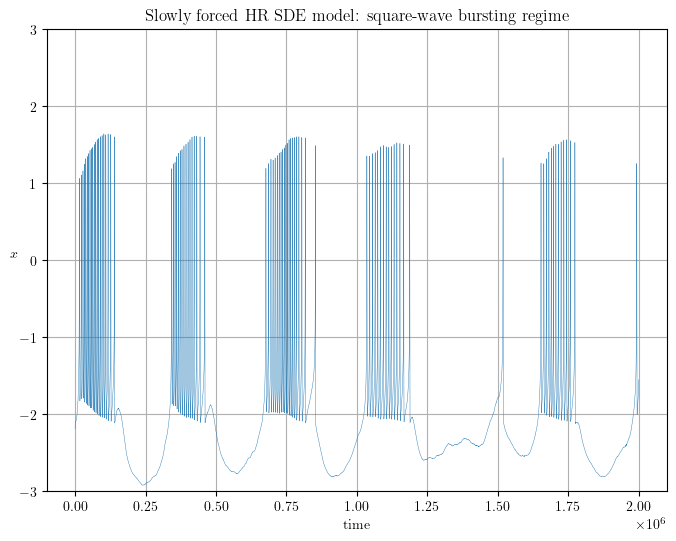

<Figure size 640x480 with 0 Axes>

In [21]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_x,linewidth=0.3)
# Add labels
plt.xlabel('time')
plt.ylabel('$x$',rotation=0)
plt.title('Slowly forced HR SDE model: square-wave bursting regime')
plt.ylim([-3, 3])
plt.grid()
plt.show()
plt.savefig('figure.png')

### SDE simulation (Euler-Maruyama): parabolic bursting regime

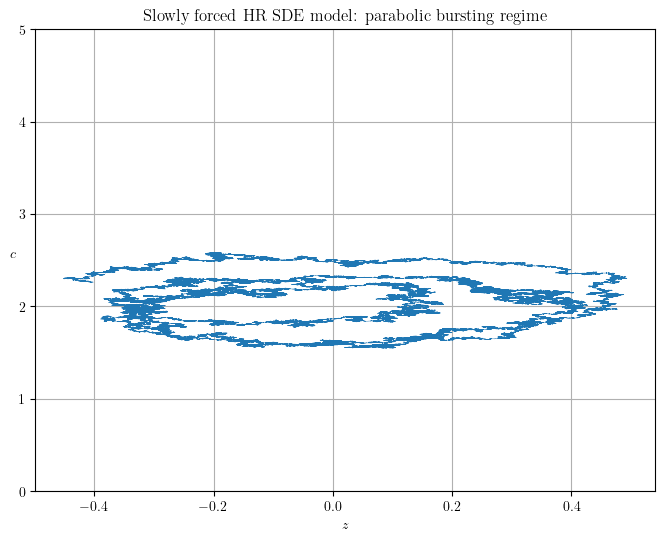

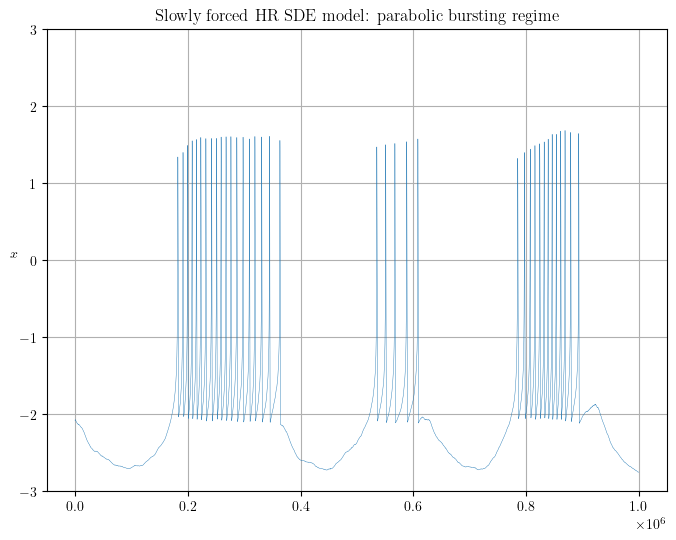

In [10]:
t_max = 2000
nb_time_steps = 1000000
d_t = t_max/nb_time_steps
time_points_sde = np.linspace(0,t_max,nb_time_steps)
sigma_z = 1.0
sigma_c = 1.0
sqrt_d_t = np.sqrt(d_t)
# fix c0 
c0=2


# --- memory allocation
solution_sde_x = np.zeros(nb_time_steps)
solution_sde_y = np.zeros(nb_time_steps)
solution_sde_z = np.zeros(nb_time_steps)
solution_sde_c = np.zeros(nb_time_steps)

# --- noise simulation
#     [simulated offline to save computation time]
std_dev_z = sqrt_d_t*sigma_z
std_dev_c = sqrt_d_t*sigma_c
np.random.seed(42)
noise_z = np.random.normal(0., std_dev_z, nb_time_steps)
noise_c = np.random.normal(0., std_dev_c, nb_time_steps)

# --- initialization
#t, x, y, z, c = 0, ini_cond2_x, ini_cond2_y, ini_cond2_z, ini_cond2_c
t, x, y, z, c = 0, -2.0789587, 0.8781782, -0.00397395, 2.2

solution_sde_x[0] = x
solution_sde_y[0] = y
solution_sde_z[0] = z
solution_sde_c[0] = c

# --- time iterations
for k in range(1,nb_time_steps):
    dot_x = c*(x-x**3/3-y+z) 
    dot_y = (x**2+d*x-b*y+a)/c
    dot_z = -eps*(c-c0)
    dot_c =  eps*(z-z0) 
    x   += d_t*dot_x
    y   += d_t*dot_y
    z   += d_t*dot_z -eps*noise_z[k]
    c   += d_t*dot_c +eps*noise_c[k]
    solution_sde_x[k] = x
    solution_sde_y[k] = y
    solution_sde_z[k] = z
    solution_sde_c[k] = c
    
# plots
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_z,solution_sde_c,linewidth=0.3)
# Add labels
plt.xlabel('$z$')
plt.ylabel('$c$',rotation=0)
plt.title('Slowly forced HR SDE model: parabolic bursting regime')
plt.ylim([0, 5])
plt.grid()
plt.show()
#
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_x,linewidth=0.3)
# Add labels
plt.ylabel('$x$',rotation=0)
plt.title('Slowly forced HR SDE model: parabolic bursting regime')
plt.ylim([-3, 3])
plt.grid()
plt.show()


### SDE simulation (Euler-Maruyama) with OU process: square-wave bursting regime

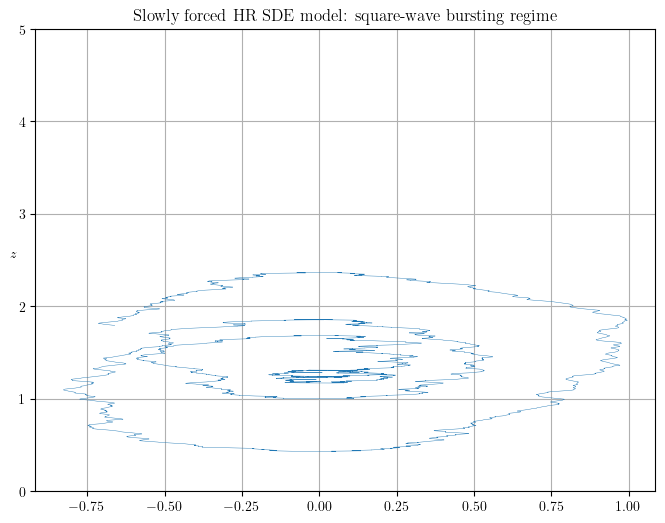

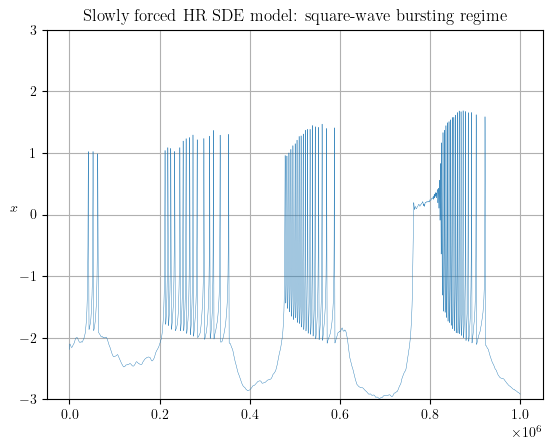

In [11]:
t_max = 2000
nb_time_steps = 1000000
d_t = t_max/nb_time_steps
time_points_sde = np.linspace(0,t_max,nb_time_steps)
sigma_u = 2.0
gamma = 1.0
sqrt_d_t = np.sqrt(d_t)
# fix c0 
c0=1.3


# --- memory allocation
solution_sde_x = np.zeros(nb_time_steps)
solution_sde_y = np.zeros(nb_time_steps)
solution_sde_z = np.zeros(nb_time_steps)
solution_sde_c = np.zeros(nb_time_steps)
solution_sde_u = np.zeros(nb_time_steps)

# --- noise simulation
#     [simulated offline to save computation time]
std_dev_u = sqrt_d_t*sigma_u
np.random.seed(42)
noise_u = np.random.normal(0., std_dev_u, nb_time_steps)

# --- initialization
t, x, y, z, c, u = 0, ini_cond1_x, ini_cond1_y, ini_cond1_z, ini_cond1_c, 0.2

solution_sde_x[0] = x
solution_sde_y[0] = y
solution_sde_z[0] = z
solution_sde_c[0] = c
solution_sde_u[0] = u

# --- time iterations
for k in range(1,nb_time_steps):
    dot_x = c*(x-x**3/3-y+z) 
    dot_y = (x**2+d*x-b*y+a)/c
    dot_z = -eps*(c-c0+u)
    dot_c =  eps*(z-z0)
    dot_u =  -gamma*u
    x   += d_t*dot_x
    y   += d_t*dot_y
    z   += d_t*dot_z
    c   += d_t*dot_c 
    u   += d_t*dot_u + noise_u[k]
    solution_sde_x[k] = x
    solution_sde_y[k] = y
    solution_sde_z[k] = z
    solution_sde_c[k] = c
    solution_sde_u[k] = u
    
# plots
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_z,solution_sde_c,linewidth=0.3)
# Add labels
plt.ylabel('$z$',rotation=0)
plt.title('Slowly forced HR SDE model: square-wave bursting regime')
#plt.xlim([0, 500000])
plt.ylim([0, 5])
plt.grid()
plt.show()
#
# plot
plt.plot(solution_sde_x,linewidth=0.3)
# Add labels
plt.ylabel('$x$',rotation=0)
plt.title('Slowly forced HR SDE model: square-wave bursting regime')
#plt.xlim([0, 500000])
plt.ylim([-3, 3])
plt.grid()
plt.show()
#plt.savefig('noise.png', dpi=300)

### SDE simulation (Euler-Maruyama) with OU process: parabolic bursting regime

/var/folders/wq/xnv3pw7560bgsqx91pqnz2vr0000gq/T/ipykernel_28410/2561950085.py:36: RuntimeWarning: overflow encountered in scalar multiply
  dot_x = c*(x-x*x*x/3-y+z)
/var/folders/wq/xnv3pw7560bgsqx91pqnz2vr0000gq/T/ipykernel_28410/2561950085.py:37: RuntimeWarning: overflow encountered in scalar multiply
  dot_y = (x*x+d*x-b*y+a)/c
/var/folders/wq/xnv3pw7560bgsqx91pqnz2vr0000gq/T/ipykernel_28410/2561950085.py:36: RuntimeWarning: invalid value encountered in scalar subtract
  dot_x = c*(x-x*x*x/3-y+z)


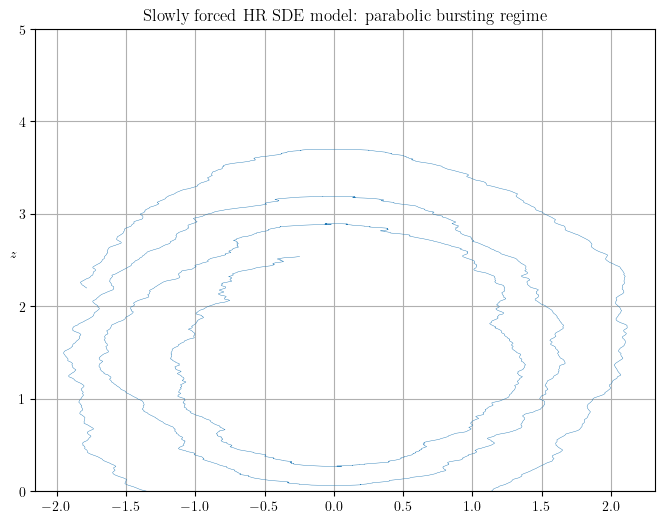

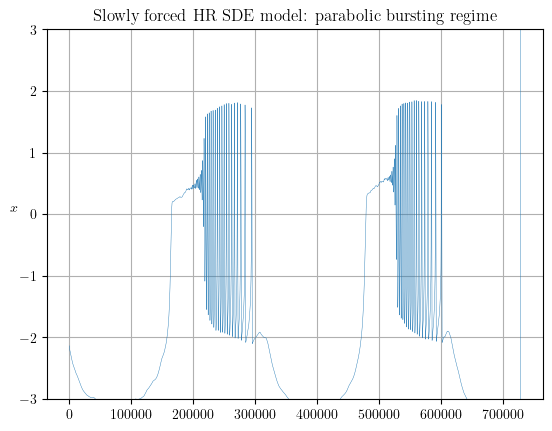

In [12]:
t_max = 2000
nb_time_steps = 1000000
d_t = t_max/nb_time_steps
time_points_sde = np.linspace(0,t_max,nb_time_steps)
sigma_u = 2.0
gamma = 1.0
sqrt_d_t = np.sqrt(d_t)
# fix c0 
c0=1.5


# --- memory allocation
solution_sde_x = np.zeros(nb_time_steps)
solution_sde_y = np.zeros(nb_time_steps)
solution_sde_z = np.zeros(nb_time_steps)
solution_sde_c = np.zeros(nb_time_steps)
solution_sde_u = np.zeros(nb_time_steps)

# --- noise simulation
#     [simulated offline to save computation time]
std_dev_u = sqrt_d_t*sigma_u
np.random.seed(42)
noise_u = np.random.normal(0., std_dev_u, nb_time_steps)

# --- initialization
t, x, y, z, c, u = 0, ini_cond2_x, ini_cond2_y, ini_cond2_z, ini_cond2_c, 0.2

solution_sde_x[0] = x
solution_sde_y[0] = y
solution_sde_z[0] = z
solution_sde_c[0] = c
solution_sde_u[0] = u

# --- time iterations
for k in range(1,nb_time_steps):
    dot_x = c*(x-x*x*x/3-y+z) 
    dot_y = (x*x+d*x-b*y+a)/c
    dot_z = -eps*(c-c0+u)
    dot_c =  eps*(z-z0)
    dot_u =  -gamma*u
    x   += d_t*dot_x
    y   += d_t*dot_y
    z   += d_t*dot_z
    c   += d_t*dot_c 
    u   += d_t*dot_u + noise_u[k]
    solution_sde_x[k] = x
    solution_sde_y[k] = y
    solution_sde_z[k] = z
    solution_sde_c[k] = c
    solution_sde_u[k] = u
    
# plots
plt.figure(figsize=(8, 6))
plt.plot(solution_sde_z,solution_sde_c,linewidth=0.3)
# Add labels
plt.ylabel('$z$',rotation=0)
plt.title('Slowly forced HR SDE model: parabolic bursting regime')
#plt.xlim([0, 500000])
plt.ylim([0, 5])
plt.grid()
plt.show()
#
# plot
plt.plot(solution_sde_x,linewidth=0.3)
# Add labels
plt.ylabel('$x$',rotation=0)
plt.title('Slowly forced HR SDE model: parabolic bursting regime')
#plt.xlim([0, 500000])
plt.ylim([-3, 3])
plt.grid()
plt.show()
#plt.savefig('noise.png', dpi=300)